# CatBoost Regression model - small data split!!!!

In [ ]:
# import packages 

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# import ML packages 
import catboost as cb
from catboost import CatBoostRegressor, Pool

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import metrics

import pickle

### Import &amp; split data

In [ ]:
"""
Since Catboost can handle text and not only int input, the dataset is import before its previous split.

"""

'\nSince Catboost can handle text and not only int input, the dataset is import before its previous split.\n\n'

In [ ]:
# import data 

gold_data_model = pd.read_csv("silver_data_model.csv")

In [ ]:
# train data 

mask = (gold_data_model['sold_date'] > '2018-12-31') & (gold_data_model['sold_date'] <= '2022-01-31')
train_data = pd.DataFrame(gold_data_model.loc[mask])

print(min(train_data['sold_date']), (max(train_data['sold_date'])))

"""
# train data 
train_data_1 = gold_data_model.loc[(gold_data_model['year'] == 2022) & (gold_data_model['month'] == 1)]
train_data_2 = gold_data_model.loc[gold_data_model['year'] <= 2021]

train_data = pd.concat([train_data_1,train_data_2])
"""
# test data 2022.02-2022.03: 
test_data_1 = gold_data_model.loc[(gold_data_model['year'] == 2022) & (gold_data_model['month'] == 2)]
test_data_2 = gold_data_model.loc[(gold_data_model['year'] == 2022) & (gold_data_model['month'] == 3)]

test_data = pd.concat([test_data_1,test_data_2])


# view shape 
print(train_data.shape, test_data.shape)

2019-01-02 2022-01-31
(3422, 16) (178, 16)


In [ ]:
train_data

,bfe,gov_property_value,gov_land_value,sold_price,unit_sqm_resi,rooms,street_name,street_number,longitude,latitude,building_year,gov_sqm,sold_date,year,month,floor
178,139177,2050000.0,493600.0,6225000,107.0,3,RobertJacobsensVej,82,12.571966,55.616705,2010.0,95.0,2022-01-31,2022,1,4.0
179,112307,2150000.0,451900.0,5525000,106.0,4,JensOttoKragsGade,17,12.570181,55.658902,2006.0,94.0,2022-01-25,2022,1,2.0
180,131723,2300000.0,376400.0,6250000,126.0,3,Strandlodsvej,18,12.620666,55.666225,1963.0,115.0,2022-01-20,2022,1,2.0
181,105096,2200000.0,374600.0,4100000,92.0,2,CarlTh.ZahlesGade,8,12.574426,55.662261,2005.0,81.0,2022-01-19,2022,1,2.0
182,140179,660000.0,55200.0,1695000,39.0,1,Østerdalsgade,1,12.603144,55.655009,1936.0,32.0,2022-01-16,2022,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,107328,2450000.0,386900.0,3700000,90.0,3,Myggenæsgade,3,12.584155,55.665330,2006.0,79.0,2019-01-02,2019,1,2.0
3596,130268,580000.0,53400.0,1295000,32.0,1,Siciliensgade,11,12.618511,55.652964,1936.0,27.0,2019-01-02,2019,1,6.0
3597,134871,1850000.0,110700.0,3650000,94.0,3,Holmbladsgade,70,12.611411,55.665193,1913.0,90.0,2019-01-02,2019,1,5.0
3598,138884,560000.0,82200.0,1175000,34.0,1,Hyacintgården,9,12.612206,55.648623,1968.0,31.0,2019-01-02,2019,1,2.0


In [ ]:
train_data.max()

bfe                     100179329
gov_property_value        5.4e+06
gov_land_value         1.0214e+06
sold_price                6600000
unit_sqm_resi                 208
rooms                           7
street_name           Østrigsgade
street_number                 305
longitude                 12.6351
latitude                  55.6687
building_year                2021
gov_sqm                       302
sold_date              2022-01-31
year                         2022
month                          12
floor                          14
dtype: object

In [ ]:
train_data.columns

Index(['bfe', 'gov_property_value', 'gov_land_value', 'sold_price',
       'unit_sqm_resi', 'rooms', 'street_name', 'street_number', 'longitude',
       'latitude', 'building_year', 'gov_sqm', 'sold_date', 'year', 'month',
       'floor'],
      dtype='object')

In [ ]:
# drop col for train
train_data = train_data.drop(columns=[
    #'street_name',
    #'year',
    'sold_date',
    #'bfe'
    ]) 

# drop col for test
test_data = test_data.drop(columns=[
    #'street_name',
    #'year',
    'sold_date',
    #'bfe'
    ]) 

In [ ]:
# split TRAIN and drop target aka. sold_price

X_train = train_data.drop(['sold_price'], axis= 1)
y_train = train_data['sold_price']
print(X_train.shape, y_train.shape)

# split TEST and drop target aka. sold_price

X_test = test_data.drop(['sold_price'], axis= 1)
y_test = test_data['sold_price']
print(X_test.shape, y_test.shape)

(3422, 14) (3422,)
(178, 14) (178,)


In [ ]:
X_train.columns

Index(['bfe', 'gov_property_value', 'gov_land_value', 'unit_sqm_resi', 'rooms',
       'street_name', 'street_number', 'longitude', 'latitude',
       'building_year', 'gov_sqm', 'year', 'month', 'floor'],
      dtype='object')

## CatBoost

### Stooop building model with best param

In [ ]:
# hot one encoded setup - only run if its needed
"""
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)
"""

"""
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")
"""

'\nX_train = pd.read_csv("X_train.csv")\ny_train = pd.read_csv("y_train.csv")\n\nX_test = pd.read_csv("X_test.csv")\ny_test = pd.read_csv("y_test.csv")\n'

In [ ]:
train_dataset = cb.Pool(X_train, y_train, cat_features=['street_name']) 
test_dataset = cb.Pool(X_test, y_test, cat_features= ['street_name'])

cat_model = cb.CatBoostRegressor(
    eval_metric = 'MAE',  
    n_estimators= 20000, 
    depth =6).fit(
        train_dataset,
        verbose=1000)

Learning rate set to 0.004354
0:	learn: 1003112.5815221	total: 2.21ms	remaining: 44.2s
1000:	learn: 235494.4076502	total: 1.58s	remaining: 30.1s
2000:	learn: 202955.9316504	total: 3.13s	remaining: 28.1s
3000:	learn: 184693.5593598	total: 4.63s	remaining: 26.2s
4000:	learn: 172673.6202627	total: 6.13s	remaining: 24.5s
5000:	learn: 163066.5104491	total: 7.64s	remaining: 22.9s
6000:	learn: 155139.0754906	total: 9.15s	remaining: 21.3s
7000:	learn: 148621.9206990	total: 10.7s	remaining: 19.8s
8000:	learn: 142839.3702350	total: 12.2s	remaining: 18.3s
9000:	learn: 137525.8104272	total: 13.7s	remaining: 16.8s
10000:	learn: 132837.0104219	total: 15.3s	remaining: 15.3s
11000:	learn: 128549.4381567	total: 16.8s	remaining: 13.7s
12000:	learn: 124529.2622433	total: 18.3s	remaining: 12.2s
13000:	learn: 120809.0835250	total: 19.9s	remaining: 10.7s
14000:	learn: 117290.7871290	total: 21.4s	remaining: 9.16s
15000:	learn: 113972.7743426	total: 22.9s	remaining: 7.64s
16000:	learn: 110868.7948566	total: 2

### Evaluate 

In [ ]:
# evaluate 

y_true = y_test # real values 
y_pred = cat_model.predict(X_test) # predicted values 

r2 = round(metrics.r2_score(y_true, y_pred), 4)
mae = round(metrics.mean_absolute_error(y_true, y_pred),2)
mape = round(metrics.mean_absolute_percentage_error(y_true, y_pred),4)

eval_dict = {'R2': r2, 'MAE': mae, 'MAPE': mape}
eval_df = pd.DataFrame.from_dict(eval_dict, orient='index').transpose()

eval_df

,R2,MAE,MAPE
0,0.9423,203834.26,0.0647


### Feature Importance

In [ ]:
# use feature_importances_, which is similar to the built-in function

feature_scores = pd.Series(cat_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

gov_property_value    26.337689
unit_sqm_resi         17.535087
latitude              11.069780
gov_sqm                9.817530
year                   9.382829
rooms                  5.092273
longitude              3.658138
floor                  3.234860
bfe                    2.882719
street_name            2.625007
gov_land_value         2.491307
month                  2.058752
building_year          2.042059
street_number          1.771968
dtype: float64

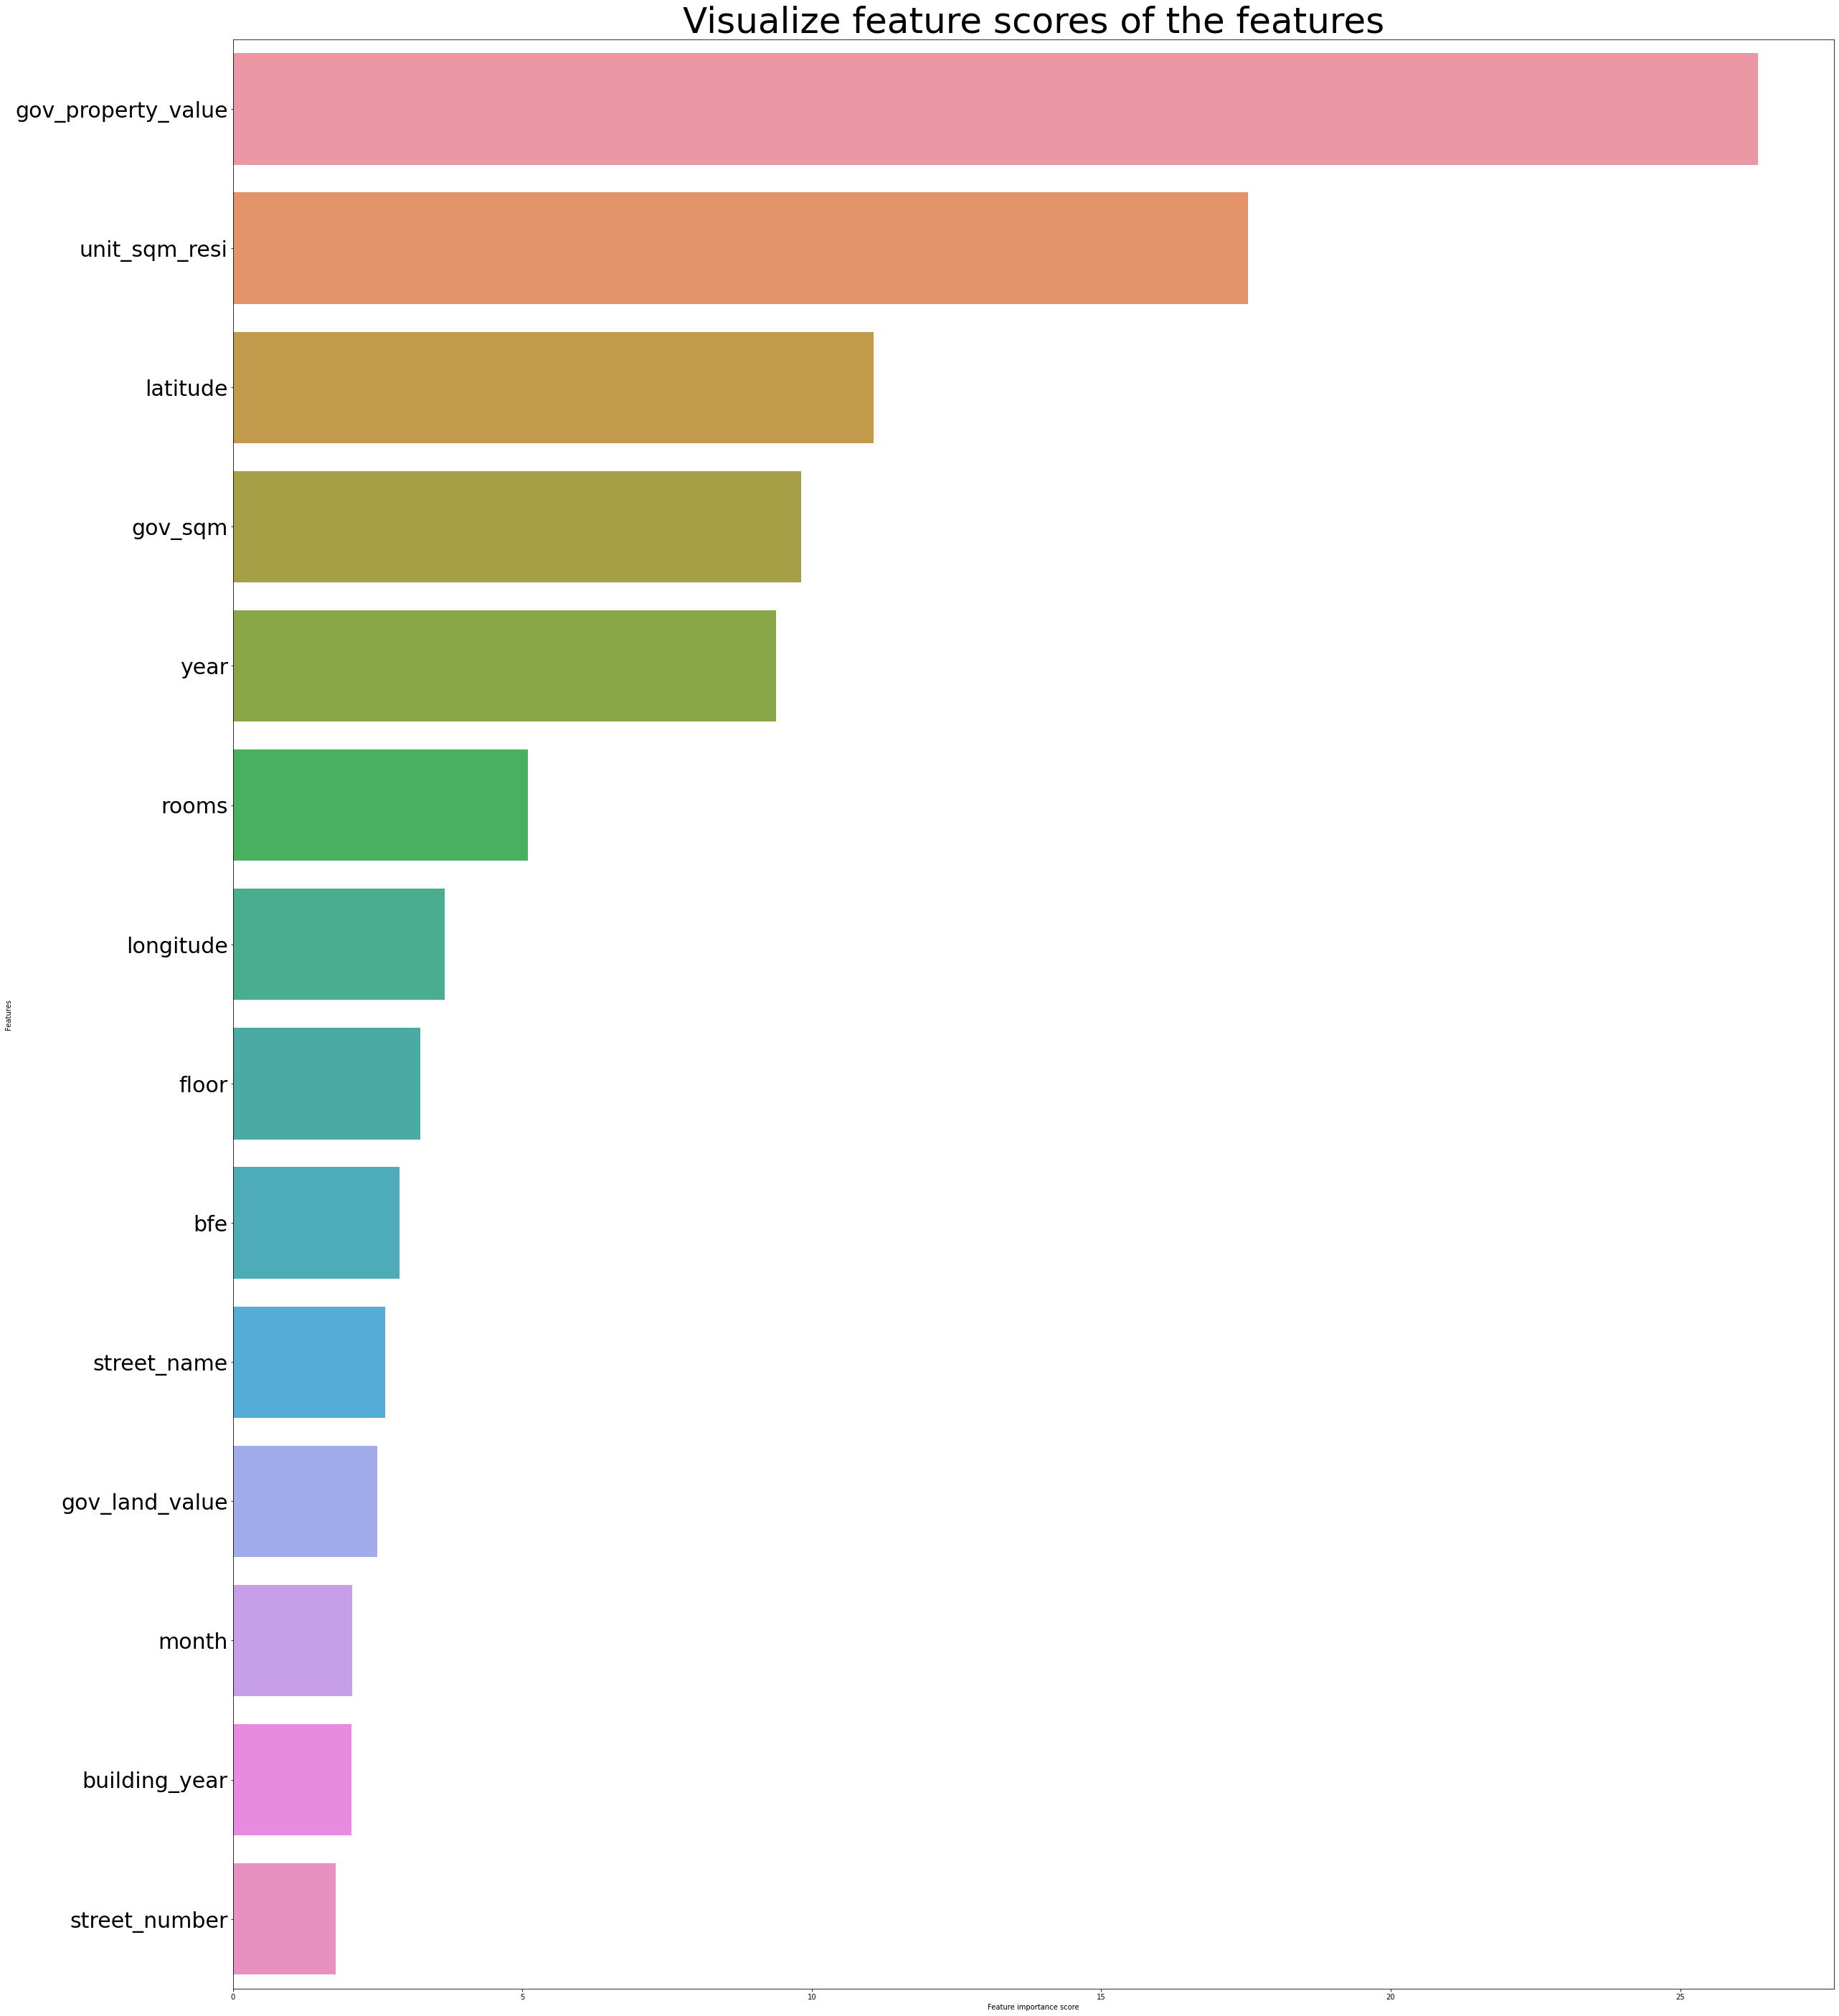

In [ ]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(40, 50))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features", fontsize=50)
ax.set_yticklabels(feature_scores.index, fontsize=30)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

### Save model

In [ ]:
"""

#save model to folder
with open('cat_model_pkl', 'wb') as files:
    pickle.dump(cat_model, files)
    """

"\n\n#save model to folder\nwith open('cat_model_pkl', 'wb') as files:\n    pickle.dump(cat_model, files)\n    "

In [ ]:
# load saved model
"""
with open('cat_model_pkl' , 'rb') as f:
    cat_model = pickle.load(f)
"""
#cat_model.predict()

"\nwith open('cat_model_pkl' , 'rb') as f:\n    cat_model = pickle.load(f)\n"

# 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8a2d9d23-5445-401b-81ac-9e4d2df66dba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>